In [1]:
import joblib
import pandas as pd
import numpy as np 
import sweetviz as sv


In [2]:
store = pd.read_csv('/Users/meetpatel/Desktop/project_6/rossmann-store-sales/store.csv')
train = pd.read_csv('/Users/meetpatel/Desktop/project_6/rossmann-store-sales/train.csv')


/var/folders/89/88_l7y257kd5mnk20gl6rm5m0000gn/T/ipykernel_5992/2761533386.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/Users/meetpatel/Desktop/project_6/rossmann-store-sales/train.csv')


In [3]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [4]:
store.shape

(1115, 10)

In [5]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [6]:
store.duplicated().sum()

0

In [7]:
store = store.dropna()

In [8]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [9]:
store.shape

(365, 10)

In [10]:
store.to_csv("/Users/meetpatel/Desktop/project_6/model file.csv")

# EDA

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 


In [12]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,559.279452,4252.958904,7.186301,2008.175342,1.0,22.531507,2011.873973
std,327.220410,5235.906306,3.254469,7.705211,0.0,13.627188,1.687220
min,2.000000,40.000000,1.000000,1900.000000,1.0,1.000000,2009.000000
25%,276.000000,600.000000,4.000000,2005.000000,1.0,13.000000,2011.000000
50%,567.000000,2220.000000,7.000000,2009.000000,1.0,18.000000,2012.000000
75%,846.000000,5390.000000,10.000000,2012.000000,1.0,37.000000,2013.000000
max,1111.000000,27190.000000,12.000000,2015.000000,1.0,48.000000,2015.000000


In [13]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [14]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

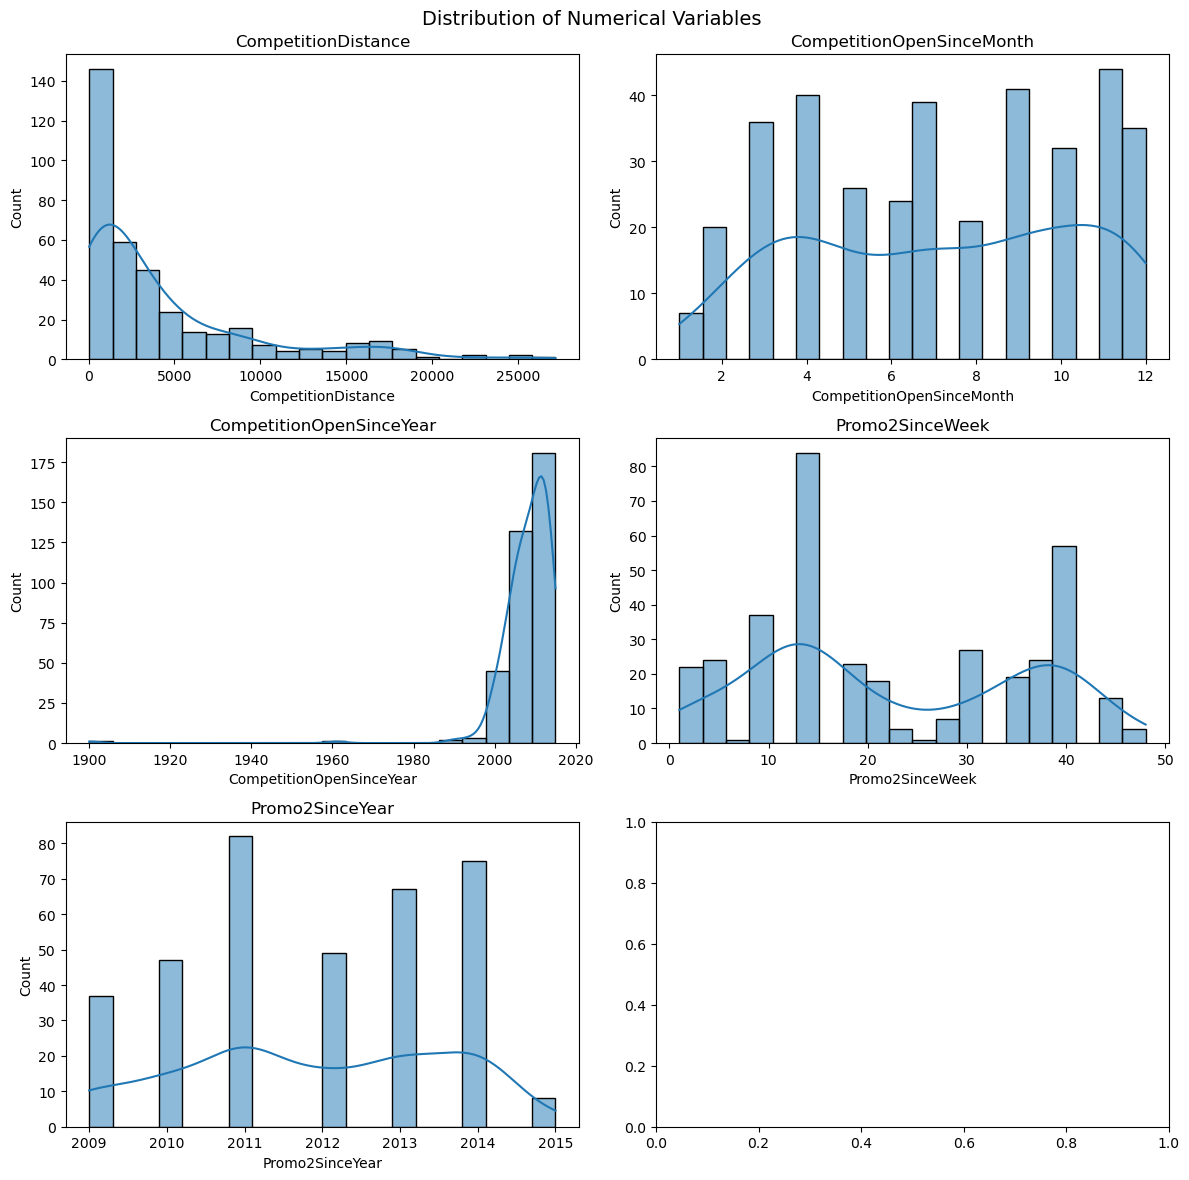

In [15]:
fig, axes = plt.subplots(nrows= 3, ncols=2, figsize=(12,12))
fig.suptitle("Distribution of Numerical Variables " , fontsize=14)

numerical_col = ["CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear",'Promo2SinceWeek', 'Promo2SinceYear']
for i, col in enumerate (numerical_col):
    sns.histplot(store[col],bins=20, kde= True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)


plt.tight_layout()
plt.show()


In [16]:
numerical_df = store.select_dtypes(include=["number"])



/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


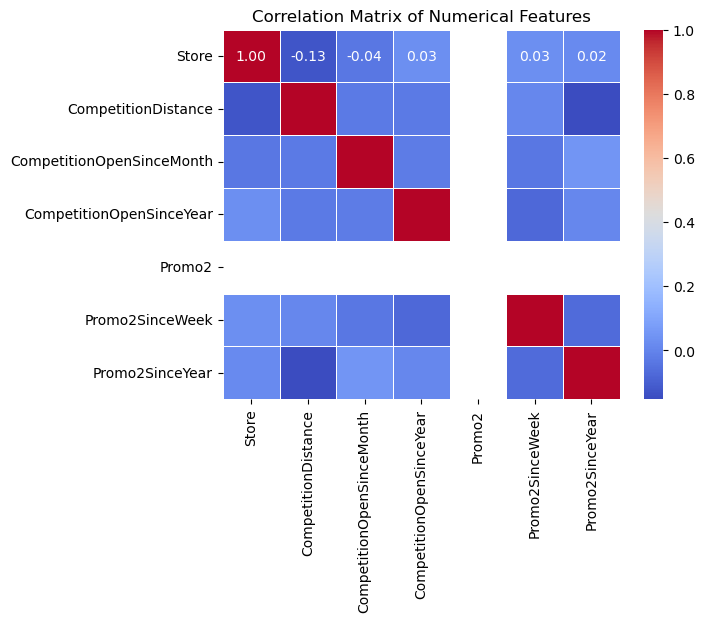

In [17]:
corr_matrix =numerical_df.corr()

plt.Figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [19]:
store.to_csv("/Users/meetpatel/Desktop/project_6/model file.csv")